<a href="https://colab.research.google.com/github/ikkiR/Treinamento_python/blob/main/Analise_de_Riscos_Sistema_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SISTEMA FUZZY : ANÁLISE DE RISCOS

ANTECEDENTES (ENTRADAS)

ORÇAMENTO : Qualidade de orçamento que o projeto terá

*   Bom
*   Médio
*   Ruim


Número de funcionários : Nivel de número de funcionários que o projeto terá


*   Alto
*   suficente
*   Baixo


Consequentes (Saidas)

Nivel de risco : qual nivel de risco esse projeto teria para a empresa

*   Arriscado
*   moderado
*   adequado


Regras:

*  se orçamento bom então nivel de risco: adequado
*  se orçamento ruim e número de funcionário baixo então nivel de risco: Arriscado
*   se orçamento ruim e número de funcionário suficiente então nivel de risco: Arriscado
*   se orçamento médio e número de funcionários suficiente então nivel de risco: moderado
* se orçamento médio e o número de funcionários baixo entao nivel de risco: moderado
* Se orçamento ruim e o número de funcionários alto entao nivel de risco: Arriscado





















# Instalando biblioteca e importando modulos

In [385]:
!pip install scikit-fuzzy

In [386]:
import numpy as np
import skfuzzy as fuzz


In [387]:
from skfuzzy import control as ctrl

# Antecedentes e consequente

In [388]:
#Criamos um eixo x : Orçamento
orcamento = ctrl.Antecedent(np.arange(0,11,1),'orçamento')

In [389]:
#Imprimir
orcamento

Antecedent: orçamento

In [390]:
#valores para eixo x: universe de discursso
orcamento.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [391]:
#Criamos um eixo x : número de funcionários
num_funcionarios = ctrl.Antecedent(np.arange(0,11,1),'número de Funcionários')

In [392]:
#imprimir
num_funcionarios

Antecedent: número de Funcionários

In [393]:
num_funcionarios.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [394]:
#Consequencia : resultado do nivel de risco : Maximo 10
nivel_risco = ctrl.Consequent(np.arange(0, 11, 1), 'nivel de risco')

In [395]:
nivel_risco

Consequent: nivel de risco

In [396]:
nivel_risco.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# Membership functions

In [397]:
#Criamos um grafico para o nivel de orçamento

orcamento.automf(number=3,names=['ruim','médio','bom'])

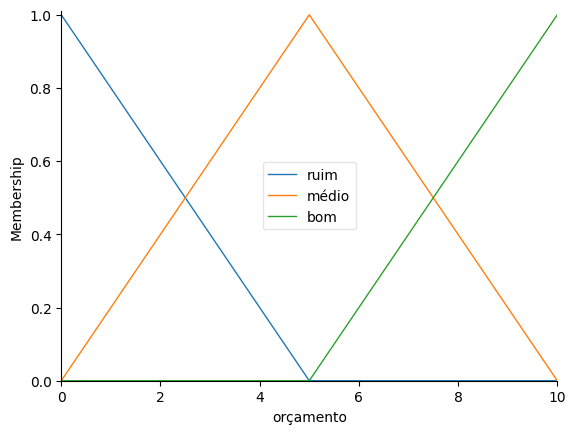

In [398]:
#Mostrar grafico construido
orcamento.view()

In [399]:
#Criamos um grafico para número de funcionários
num_funcionarios.automf(number=3,names=['baixo','suficiente','alto'])

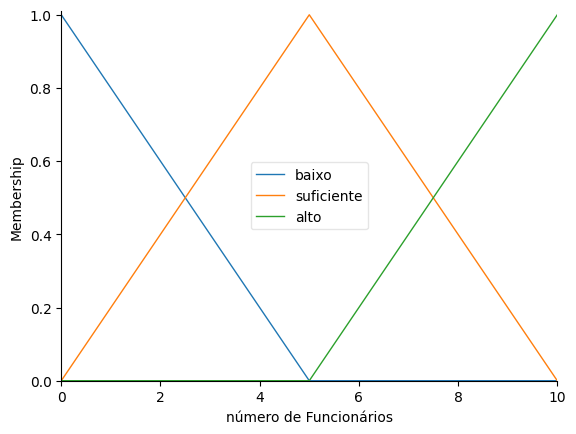

In [400]:
num_funcionarios.view()

In [401]:
#definicao da funçao risco manualmente
# Triangulo tem 3 vertices
nivel_risco['Adequado'] = fuzz.trimf(nivel_risco.universe, [0, 0, 3])
nivel_risco['Moderado'] = fuzz.trimf(nivel_risco.universe, [2, 5, 7])
nivel_risco['Arriscado'] = fuzz.trimf(nivel_risco.universe, [6, 10, 10])

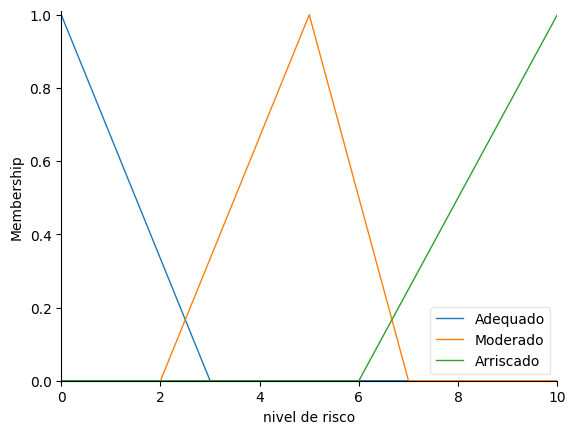

In [402]:
nivel_risco.view()

In [403]:
#se orçamento bom então nivel de risco: adequado
regra1 = ctrl.Rule(orcamento['bom'], nivel_risco['Adequado'])
#se orçamento ruim e número de funcionário baixo então nivel de risco: Arriscado
regra2 = ctrl.Rule(orcamento['ruim'] & num_funcionarios['baixo'], nivel_risco['Arriscado'])
#se orçamento ruim e número de funcionário suficiente então nivel de risco: Arriscado
regra3=ctrl.Rule(orcamento['ruim'] & num_funcionarios['suficiente'], nivel_risco['Arriscado'])
#se orçamento médio e número de funcionários suficiente então nivel de risco: moderado
regra4=ctrl.Rule(orcamento['médio'] & num_funcionarios['suficiente'], nivel_risco['Moderado'])
# Se orçamento médio e o número de funcionários baixo entao nivel de risco: moderado
regra5=ctrl.Rule(orcamento['médio'] & num_funcionarios['baixo'], nivel_risco['Moderado'])
# Se orçamento ruim e o número de funcionários alto entao nivel de risco: Arriscado
regra6=ctrl.Rule(orcamento['ruim'] & num_funcionarios['alto'], nivel_risco['Arriscado'])

# Sistema de Controle

In [404]:
#Aplicar as regras e fazendo defuzzyficação
sistema_controle=ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6])

In [405]:
#Sistema de simulação: criamos um simulador
sistema = ctrl.ControlSystemSimulation(sistema_controle)
sistema.defuzzify_method = 'lom'

In [406]:
sistema.input['orçamento'] = 5
sistema.input['número de Funcionários'] = 0
sistema.compute()

In [407]:
print(sistema.output['nivel de risco'])

4.666666666666667


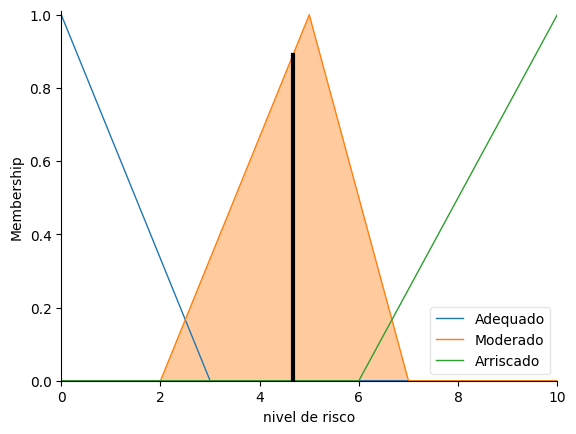

In [408]:
nivel_risco.view(sim = sistema)

# Outros testes

In [409]:
sistema.input['orçamento'] = 9
sistema.input['número de Funcionários'] = 1
sistema.compute()

In [410]:
print(sistema.output['nivel de risco'])

2.380840664711632


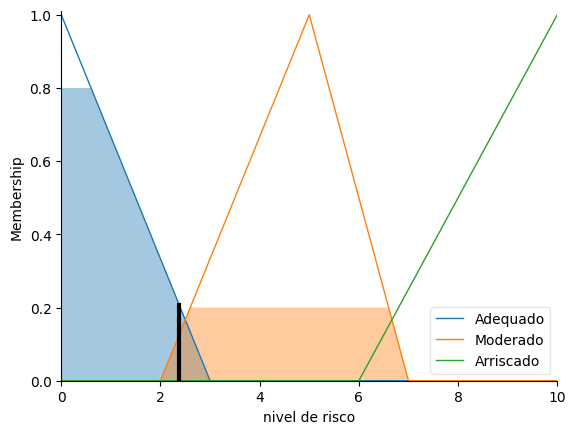

In [411]:
nivel_risco.view(sim = sistema)

In [412]:
sistema.input['orçamento'] = 2
sistema.input['número de Funcionários'] = 8
sistema.compute()

In [413]:
print(sistema.output['nivel de risco'])

6.602355350742447


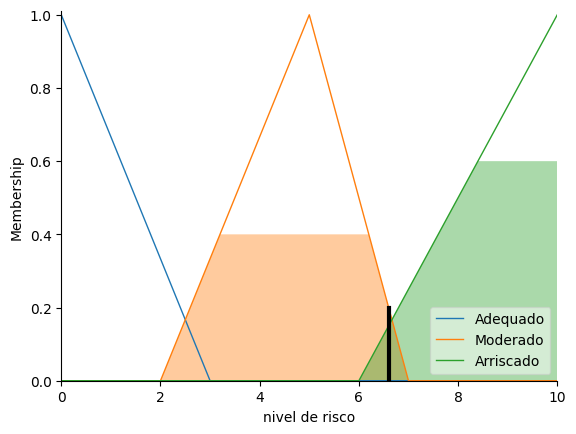

In [414]:
nivel_risco.view(sim = sistema)

# CONCLUSAO

  O sistema fuzzy desenvolvido ao longo deste projeto demonstrou-se eficaz e adequado para apoiar a análise de riscos em projetos, proporcionando uma abordagem estruturada capaz de lidar com múltiplos fatores de forma simultânea. A lógica fuzzy se mostrou especialmente vantajosa por sua capacidade de interpretar informações subjetivas e imprecisas, características comuns em processos de avaliação de risco, onde muitas variáveis não podem ser representadas com exatidão numérica. Ao possibilitar a criação de regras linguísticas e funções de pertinência adaptáveis, o modelo permitiu representar o conhecimento humano de maneira mais próxima da realidade, oferecendo uma estimativa confiável para o nível de risco em diferentes cenários. Além disso, o projeto evidenciou o potencial prático da lógica fuzzy como ferramenta de apoio à tomada de decisão estratégica em ambientes corporativos, contribuindo para a redução de incertezas e para a melhoria na gestão de projetos. A aplicação desse modelo em contextos reais pode representar um diferencial importante para empresas que lidam com decisões baseadas em informações subjetivas, permitindo maior segurança e racionalidade nas escolhas.